#### ¿Qué es este documento?

_Este notebook de Jupyter es una herramienta interactiva para la enseñanza del tiro parabólico en la asignatura de Física y Química de 1º de Bachillerato_

# Tiro parabólico

Como vimos anteriormente en clase, se pueden combinar dos tipos diferentes de movimientos para construir una trayectoria más compleja. Así, el _tiro parabólico_ constituye un perfecto ejemplo.

Si consideramos un **movimiento rectilíneo uniforme** en la dirección _X_, combinado con un **movimiento uniformemente acelerado** en la dimensión _Y_, tomando la aceleración como la fuerza de la gravedad, obtenemos las trayectorias de un objeto que describe un tiro parabólico:

$$x(t) = x_0 + v_xt$$
$$y(t) = y_0 + v_yt-\frac{1}{2}gt^2$$

La sencillez de estos problemas radica en el empleo de la técnica de superposición de dos movimientos independientes entre sí: el movimiento vertical y el movimiento horizontal.

# Instrucciones de uso

En este notebook de Jupyter tienes una serie de programas escritos en Python que simulan casos de tiro parabólico. Siéntete libre de experimentar, modificar cosas, cambiar variables, de cambiar el valor de la gravedad... Si "rompes" algo, simplemente recarga la página y todo volverá a su estado original.

Cuando quieras ejecutar uno de los programas, haz _click_ una vez con el ratón sobre el código y pulsa la tecla _SHIFT_ y la tecla _ENTER_ a la vez.

# Ejercicios

1.) Desde la ventana de tu habitación, que se encuentra a 5 metros de altura, se ve una canasta de juguete que mide 75 cm de altura y que se encuentra a 7 metros de distancia. Decides intentar encestar una pelota de baloncesto, lanzando la pelota en un ángulo de 60°

 * a) Halla el vector velocidad inicial que debes imprimir a la pelota para encestar.     
 * b) Si en vez de en la Tierra, viviésemos en la [Luna](https://es.wikipedia.org/wiki/Luna), vuelve a calcular el vector velocidad.
 * c) Si sólo fueses capaz de imprimirle a la pelota una velocidad máxima $5$ $m/s$, ¿a qué distancia tendría que estar la canasta para que pudieses encestar?
 
Genera las siguientes gráficas:

 * Trayectorias para el caso de la Luna y la Tierra
 * Trayectoria si la velocidad máxima a imprimir a la pelota es de $5$ $m/s$

2.) Un arquero, situado a ras de suelo, desea lanzar una flecha con el objetivo de alcanzar la máxima distancia posible. 
 * Halla el ángulo $\alpha$ para el cual la altura alcanzada por la flecha es igual equivalga a la distancia recorrida.
 
## <span style="color:orange">**Ejercicios de ampliación:**</span>

1. Expresa el alcance de la flecha en función del ángulo $\alpha$ de tiro, para el caso más general (es decir: un tirador situado a cualquier altura): $x(\alpha)$. Más abajo tienes un programa que lo resuelve. Úsalo para comprobar y validar tu solución.

### Programa para el ejercicio 1

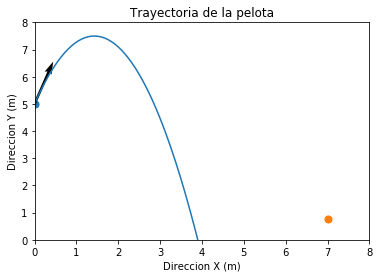

Ángulo de tiro: 74.0546040991° 


In [9]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#####################################################
#     Modifica las variables del problema aquí:     #
#####################################################
# posiciones iniciales (m) y velocidades (m/s)
x0=0
y0=5
vx=2
vy=7
# posición en metros de la canasta
canastax=7
canastay=0.75
# tiempo de vuelo de la pelota (s)
tvuelo=10
# gravedad: m/s^2
a=-9.81
######################################################

# calculo el ángulo de tiro
alfa = np.arctan(vy/vx)*360/(2*np.pi)

t=np.linspace(0,tvuelo,500)

# pinto la ventana y la canasta
plt.scatter(x0,y0,s=50.0)
plt.scatter(canastax,canastay,s=50.0)

# Pinto la trayectoria
plt.plot(x0+vx*t, y0+vy*t+0.5*a*t*t)
plt.quiver(x0,y0,vx,vy, angles='xy', scale_units='xy', scale=4.5)
plt.xlim(0, canastax+1)
plt.ylim(0, 8)
plt.title('Trayectoria de la pelota')
plt.xlabel(r'Direccion X (m)')
plt.ylabel(r'Direccion Y (m)')
plt.show()

print("Ángulo de tiro: ",alfa,"° ",sep="")


### Programa para el ejercicio 2

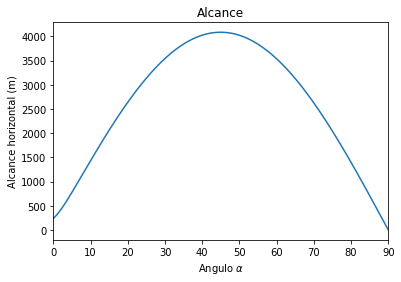

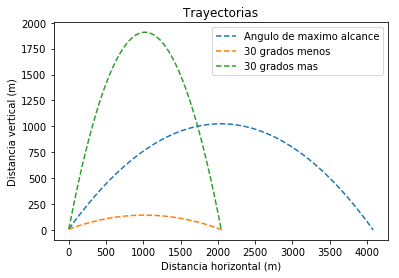

Ángulo de alcance máximo: 44.9509029985° Alcance máximo: 4084.46596905 m. Tiempo de vuelo: 28.8568189069 s


In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# función que me da el alcance en función del ángulo
# y del módulo de la velocidad inicial, para el caso
# más general
def alcance(v0,alfa,a,h):
    z=(-a*h)/(v0*v0)
    radianes = np.deg2rad(alfa)
    return (-v0*v0/a)*(np.sin(radianes)+np.sqrt(np.sin(radianes)**2+2*z))*np.cos(radianes)

# función que me da el ángulo en grados para el caso
# de alcance máximo
def anguloalcancemaximo(v0,a,h):
    tangentealfamax = v0/np.sqrt(v0*v0-2*a*h)
    return np.rad2deg(np.arctan(tangentealfamax))


#####################################################
#     Modifica las variables del problema aquí:     #
#####################################################
# Arquero que dispara desde 7 metros de altura,
# con una velocidad de 200 m/s
h  = 7
v0 = 200
a  = -9.81
#####################################################


# Pinto el alcance en función del ángulo
array_alfas = np.linspace(0,90,200)
plt.plot(array_alfas, alcance(v0,array_alfas,a,h))


plt.xlim(0, 90)
plt.title('Alcance')
plt.xlabel(r'Angulo $\alpha$')
plt.ylabel(r'Alcance horizontal (m)')
plt.show()

alfa = anguloalcancemaximo(v0,a,h)
alcancemaximo = alcance(v0,alfa,a,h)
# Con el ángulo de alcance máximo:
vx = v0*np.cos(np.deg2rad(alfa))
vy = v0*np.tan(np.deg2rad(alfa))*np.cos(np.deg2rad(alfa))
tiempovuelo = alcancemaximo/vx
t = np.linspace(0,tiempovuelo,500)

# Con 30 grados menos:
vx_menos30 = v0*np.cos(np.deg2rad(alfa-30))
vy_menos30 = v0*np.tan(np.deg2rad(alfa-30))*np.cos(np.deg2rad(alfa-30))
tiempovuelo_menos30 = alcance(v0,alfa-30,a,h)/vx_menos30
t_menos30 = np.linspace(0,tiempovuelo_menos30,500)
# Con 30 grados más:
vx_mas30 = v0*np.cos(np.deg2rad(alfa+30))
vy_mas30 = v0*np.tan(np.deg2rad(alfa+30))*np.cos(np.deg2rad(alfa+30))
tiempovuelo_mas30 = alcance(v0,alfa+30,a,h)/vx_mas30
t_mas30 = np.linspace(0,tiempovuelo_mas30,500)


# Pinto la trayectoria
plt.plot(vx*t, h+vy*t+0.5*a*t*t, '--',label='Angulo de maximo alcance')
plt.plot(vx_menos30*t_menos30, h+vy_menos30*t_menos30+0.5*a*t_menos30*t_menos30, '--',label='30 grados menos')
plt.plot(vx_mas30*t_mas30, h+vy_mas30*t_mas30+0.5*a*t_mas30*t_mas30, '--', label='30 grados mas')
plt.title('Trayectorias')
plt.xlabel(r'Distancia horizontal (m)')
plt.ylabel(r'Distancia vertical (m)')
plt.legend(loc='best')
plt.show()

print('Ángulo de alcance máximo: ',alfa,'° Alcance máximo: ',alcancemaximo,' m. Tiempo de vuelo: ',tiempovuelo,' s',sep='')

**Observa:** ¡Hay dos trayectorias diferentes, con distinto ángulo de tiro, que tienen el mismo alcance! ¿Puedes explicar por qué?

# Recursos para ampliar conocimientos

* [Entrada de la Wikipedia sobre el tiro parabólico](https://es.wikipedia.org/wiki/Movimiento_parab%C3%B3lico)
**¡Ojo!** ¡Recuerda que aunque la Wikipedia es un sitio estupendo para buscar información debes siempre contrastar lo que consultes ahí!
* [Curso Interactivo de Física en Internet: Alcance máximo en el plano horizontal](http://www.sc.ehu.es/sbweb/fisica/cinematica/parabolico/alcance/alcance.htm)
* [Repaso de proyectiles de la Universidad de Sonora](http://www.fisica.uson.mx/mecanica/proyectiles/Documentacion/TeoriaProyectiles.htm)


[![Creative Commons. BY SA NC](https://i.creativecommons.org/l/by-nc-sa/3.0/nl/88x31.png)](https://creativecommons.org/)